# CONSUMER PURCHASE BEHAVIOUR ANALYSIS:

1. Problem:
To Predict Black-Friday purchase.

2. Data:
Dataset comprises of sales transactions captured at a retail store. 
Source:https://www.kaggle.com/sdolezel/black-friday

3. Modelling:
Since we have a regression problem we are going to apply a regression model. In this case Random Forest Regressor. 

4. Evaluation:
We use three evaluation matrices: Mean Squared error (MSE), Mean Absolute Error(MAE), and R^2 / co-efficient of determination.

5. Model improvement:
We apply hyperparameter tuning to improve our model, we use RandomSearchCV accordingly.

# Train Data:

In [1]:
#1. Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
#2. Importing the dataset
dataset=pd.read_csv("Black_Friday.csv")
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
dataset.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


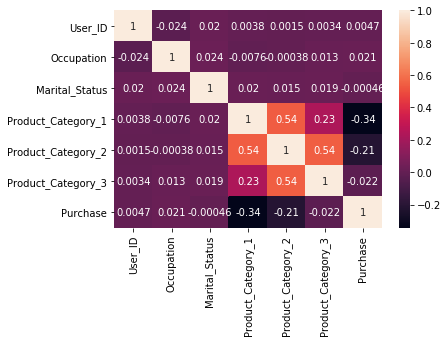

In [5]:
sns.heatmap(dataset.corr(),annot=True)

In [6]:
#3. Data Visualisation

In [7]:
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [8]:
def simple_bar_plot(data, title = None):
    data.plot(kind="bar", title = title)
    pass

In [9]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[0], fontweight="bold")
        return [tx]

In [10]:
#Top 10 poducts sold
dataset['Product_ID'].value_counts(sort=True)[:10]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Product_ID, dtype: int64

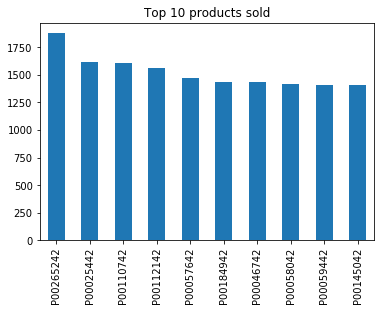

In [11]:
#Plotting the top 10 products sold
simple_bar_plot(dataset["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

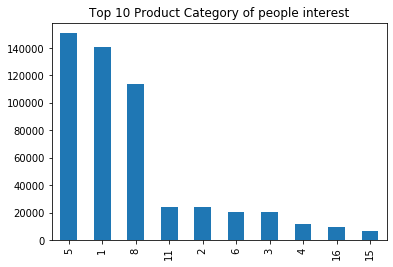

In [12]:
#Plotting the product category
simple_bar_plot(dataset["Product_Category_1"].value_counts(sort=True)[:10], title = "Top 10 Product Category of people interest")

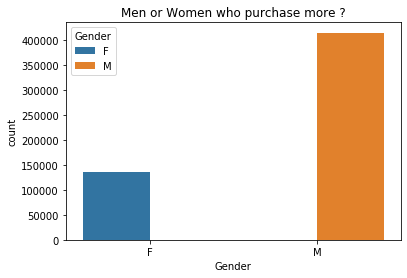

In [13]:
#Check who purchase more
count_plot(dataset,"Gender","Men or Women who purchase more ?","Gender")

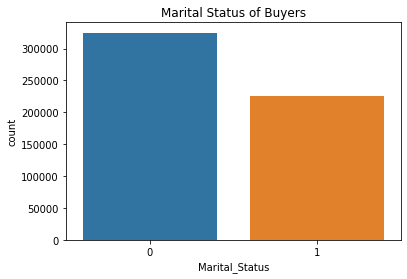

In [14]:
count_plot(dataset,"Marital_Status","Marital Status of Buyers")

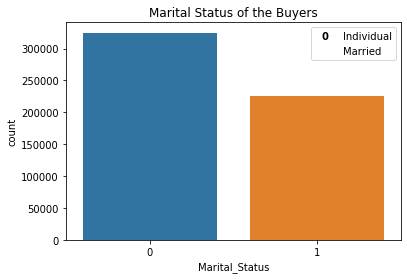

In [15]:
ax=sns.countplot(dataset.Marital_Status) 
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()

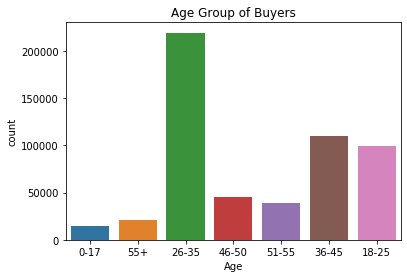

In [16]:
count_plot(dataset,"Age","Age Group of Buyers")

In [17]:
#We can conclude that the highest number of customers belong to the age group between 26 and 35.


In [18]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [19]:
dataset['User_ID'].nunique()


5891

In [20]:
#We can observe that during Black Friday, 5,891 different customers have bought something from the store.

In [21]:
dataset['Product_ID'].nunique()

3631

In [22]:
#Here we can observe that 3,631 different products are sold.

In [23]:
#The Occupation number is the ID number of occupation type of each customer.

#We can see that around 20 different occupations exist.

#First, we need to create the function which will extract all unique elements from one column. 

#We use the unique function for that, from the numpy Python library.

In [24]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))
    print("The unique ID numbers of customers occupations:")
unique(dataset['Occupation'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
The unique ID numbers of customers occupations:


In [25]:
#From the above output we can observe 21 different occupation ID's are registered during the shopping day

#The Occupation number could represent different professions of customers

#So We have to find how much money each costumer group (grouped by occupation ID) spent

#We can use a for loop and sum the spent money for each individual occupation ID

In [26]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(dataset[dataset['Occupation'] == oid]['Purchase'].sum())

spent_money

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

In [27]:
#We have created the list spent_money, which includes summed quantities of dollars for the Occupations IDs - from 0 to 20

In [28]:
#The graph is plotted to show the information about how much money is spent per occupation category.


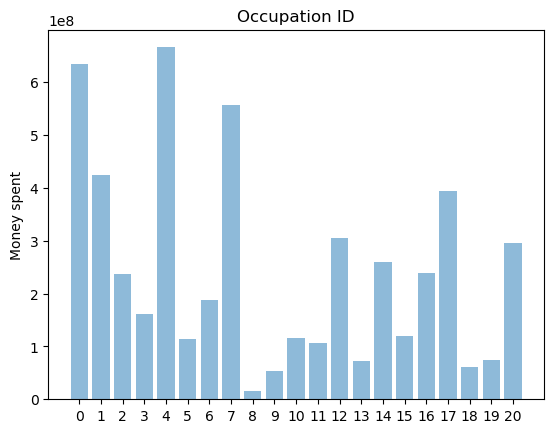

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

In [30]:
dataset['City_Category'].nunique()

3

In [31]:
#City_category gives us information about cities from which the customers are. 
#From the above output we can see that customers are from 3 different cities.

In [32]:
#We are using piechart to display the information about the ratio of customers from each city in percentages. 



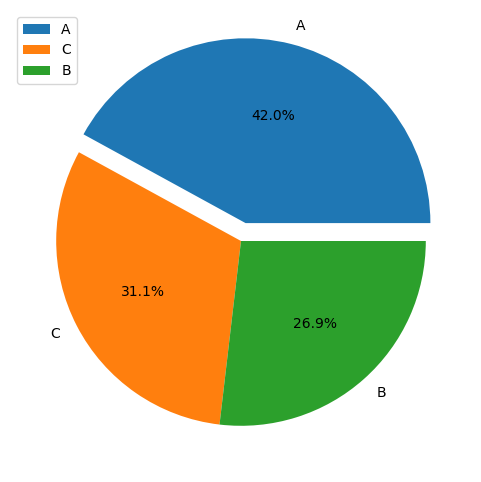

In [33]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(dataset['City_Category'].value_counts(), explode=explode, labels=dataset['City_Category'].unique(),
autopct='%1.1f%%')
plt.legend()
plt.show()

In [34]:
#4. Handling the missing data

In [35]:
dataset.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [36]:
#It looks like product category 3 has more null values which is close to 70 percent of the data, so we delete the feature.
#We are keeping product category 1 and 2.

In [37]:
#dataset.drop(["Product_Category_3"],  axis=1, inplace=True)
dataset['Product_Category_3'].fillna((dataset['Product_Category_3'].median()), inplace=True)

In [38]:
dataset['Product_Category_2'].fillna((dataset['Product_Category_2'].median()), inplace=True)


In [39]:
dataset.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [41]:
dataset = dataset.drop(['User_ID','Product_ID'], axis=1)
#We are dropping these 2 columns as it is not useful for the data prediction.

In [42]:
dataset.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969
5,M,26-35,15,A,3,0,1,2.0,14.0,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,14.0,15854
8,M,46-50,7,B,2,1,1,16.0,14.0,15686
9,M,26-35,20,A,1,1,8,9.0,14.0,7871


In [43]:
dataset.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [44]:
#5. Label_Encoding
#We will encode the data into labels using label encoder for easy computing.

In [45]:
Label_Encoder = LabelEncoder()
dataset["Gender"] = Label_Encoder.fit_transform(dataset["Gender"])
dataset["City_Category"] = Label_Encoder.fit_transform(dataset["City_Category"])
dataset["Age_Category"] = Label_Encoder.fit_transform(dataset["Age"]).astype(int)

In [46]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Category
0,0,0-17,10,0,2,0,3,9.0,14.0,8370,0
1,0,0-17,10,0,2,0,1,6.0,14.0,15200,0
2,0,0-17,10,0,2,0,12,9.0,14.0,1422,0
3,0,0-17,10,0,2,0,12,14.0,14.0,1057,0
4,1,55+,16,2,4+,0,8,9.0,14.0,7969,6


In [47]:
dataset.Gender.unique(), dataset.Age.unique(),   dataset.City_Category.unique() 


(array([0, 1]),
 array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object),
 array([0, 2, 1]))

In [48]:
dataset = dataset.drop(['Age'], axis=1)
dataset.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Category
0,0,10,0,2,0,3,9.0,14.0,8370,0
1,0,10,0,2,0,1,6.0,14.0,15200,0
2,0,10,0,2,0,12,9.0,14.0,1422,0
3,0,10,0,2,0,12,14.0,14.0,1057,0
4,1,16,2,4+,0,8,9.0,14.0,7969,6


In [49]:
dataset.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [50]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(stay).astype(int)

In [51]:
dataset.dtypes

Gender                          int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Age_Category                    int32
dtype: object

In [52]:
dataset['Product_Category_2']=dataset['Product_Category_2'].astype(int)

In [53]:
dataset['Product_Category_3']=dataset['Product_Category_3'].astype(int)

In [54]:
dataset.dtypes

Gender                        int32
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int32
Product_Category_3            int32
Purchase                      int64
Age_Category                  int32
dtype: object

In [55]:
dataset=dataset[['Gender','City_Category','Age_Category','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
dataset

,Gender,City_Category,Age_Category,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,10,2,0,3,9,14,8370
1,0,0,0,10,2,0,1,6,14,15200
2,0,0,0,10,2,0,12,9,14,1422
3,0,0,0,10,2,0,12,14,14,1057
4,1,2,6,16,4,0,8,9,14,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,1,5,13,1,1,20,9,14,368
550064,0,2,2,1,3,0,20,9,14,371
550065,0,1,2,15,4,1,20,9,14,137
550066,0,2,6,1,2,0,20,9,14,365


In [56]:
x=dataset.iloc[:,0:9].values
x

array([[ 0,  0,  0, ...,  3,  9, 14],
       [ 0,  0,  0, ...,  1,  6, 14],
       [ 0,  0,  0, ..., 12,  9, 14],
       ...,
       [ 0,  1,  2, ..., 20,  9, 14],
       [ 0,  2,  6, ..., 20,  9, 14],
       [ 0,  1,  4, ..., 20,  9, 14]], dtype=int64)

In [57]:
y=dataset.iloc[:,9:].values
y

array([[ 8370],
       [15200],
       [ 1422],
       ...,
       [  137],
       [  365],
       [  490]], dtype=int64)

In [58]:
x.ndim

2

In [59]:
y.ndim

2

In [60]:
x.shape

(550068, 9)

In [61]:
#6. Feature_Scaling

In [62]:
SS= StandardScaler()

In [63]:
xs=SS.fit_transform(x)

In [64]:
#7. Training and testing the model and its evaluation.

In [65]:
#Since we have a regression problem we are going to apply a regression model in this case Random Forest Regressor.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf_regressor = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

rf_regressor.fit(x_train, y_train)

C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [69]:
y.ravel()

array([ 8370, 15200,  1422, ...,   137,   365,   490], dtype=int64)

In [70]:
rf_regressor.score(x_test, y_test)

0.6330651779381367

In [71]:
from joblib import dump
dump(rf_regressor,'rf_regressor.save')

['rf_regressor.save']

In [72]:
y_pred = rf_regressor.predict(x_test)
y_pred=y_pred.astype(int)
y_pred

array([15610,  1154, 15652, ..., 16271, 14835, 14737])

In [73]:
r2 = r2_score(y_test, y_pred)
r2

0.6330643631354321

In [74]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2213.44640682095

In [75]:
MSE = mean_squared_error(y_test, y_pred)
MSE

9265878.085979966

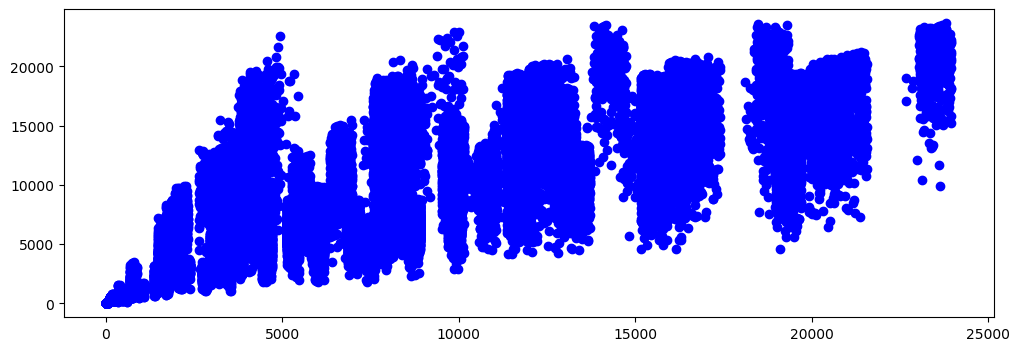

In [76]:
fig, ax = plt.subplots(figsize=(12,4))
ax = plt.scatter(y_test, y_pred, c="blue")

Hyperparameter Tuning:

Optimizing hyperparameters for machine learning models is a key step in making accurate predictions. Hyperparameters define characteristics of the model that can impact model accuracy and computational efficiency. They are typically set prior to fitting the model to the data. In contrast, parameters are values estimated during the training process that allow the model to fit the data. Hyperparameters are often optimized through trial and error; multiple models are fit with a variety of hyperparameter values, and their performance is compared.

Cross-validation is often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. A variety of hyperparameter values should be considered. For example, below are some candidate hyperparameters. 

1. number of trees
n_estimators=[500, 800, 1500, 2500, 5000]
2. max no of features to consider at every split
max_features=['auto', 'sqrt', 'log2']
3. max no of levels in tree
max_depth=[10, 20, 30, 40, 50]
max_depth.append(None)
4. min no of samples required to split a node
min_samples_split=[2, 5, 10, 15, 20]
5. min no of samples required to split of each leaf node
min_samples_leaf=[1, 2, 5, 10, 15]

In [77]:
grid =  {"n_estimators": [10,50,100],
       "max_depth": [None,10,20,30,40,50,],
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": [2,10,15],
       "min_samples_split": [2,5,20]}

In [78]:
randomsearchCV = RandomizedSearchCV(rf_regressor, param_distributions = grid, n_iter = 5, cv=5,  verbose = True, n_jobs=2 )
     

In [79]:
#Verbose is a general programming term for produce lots of logging output.
#If we specify n_jobs to -1, it will use all cores in the CPU (100% CPU).
#If it is set to 1 or 2, it will use one or two cores only.

In [80]:
%time

randomsearchCV.fit(x_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:  9.4min finished
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [81]:
randomsearchCV.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [82]:
#Fitting the data with the best hyperparameters

In [83]:
rf_regressor_tune = RandomForestRegressor(n_estimators=100, max_depth = 40, max_features = 'auto', min_samples_leaf =10,
min_samples_split=2 )

In [84]:
rf_regressor_tune.fit(x_train, y_train) 

C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
y_pred_tune = rf_regressor_tune.predict(x_test)
y_pred_tune=y_pred.astype(int)

In [86]:
#rf_regressor.score(x_test, y_test)

r2_tune = r2_score(y_test, y_pred_tune)  
r2_tune

0.6330643631354321

In [87]:
MAE_tune = mean_absolute_error(y_test, y_pred_tune)
MAE_tune

2213.44640682095

In [88]:
MSE_tune = mean_squared_error(y_test, y_pred_tune)
MSE_tune

9265878.085979966

In [89]:
#Compare the prediction before and after Tunning

compare = {"R^2_score":[r2_tune, r2],
            "Mean Squared Error": [MSE_tune, MSE],
            "Mean Absolute Error": [MAE_tune, MAE]}

compare

{'R^2_score': [0.6330643631354321, 0.6330643631354321],
 'Mean Squared Error': [9265878.085979966, 9265878.085979966],
 'Mean Absolute Error': [2213.44640682095, 2213.44640682095]}

In [90]:
Compare = pd.DataFrame(compare, index=[["After_tune", "Before Tune"]])
Compare

,R^2_score,Mean Squared Error,Mean Absolute Error
After_tune,0.633064,9.265878e+06,2213.446407
Before Tune,0.633064,9.265878e+06,2213.446407


In [91]:
#In all the three cases our model performed good while tuning hyperparameters.
#We have got higher R^2, and lower MSE & MAE compared to same values before tuning the hyperparameters.

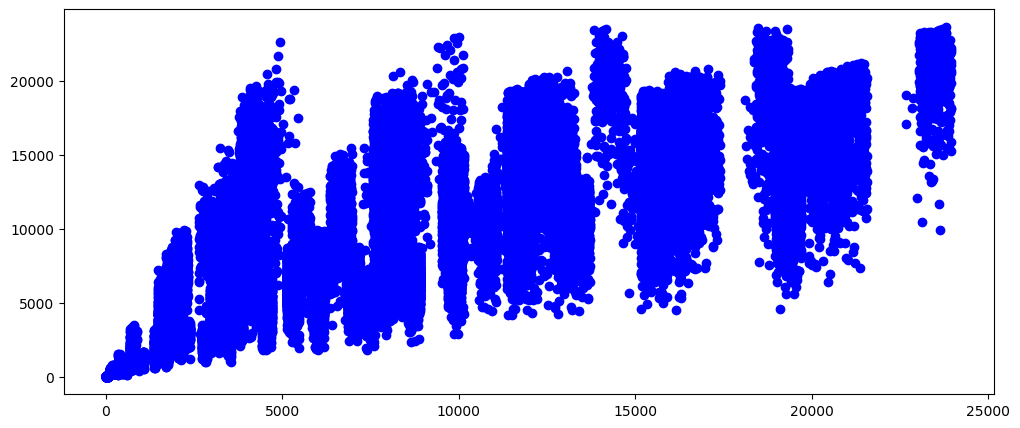

In [92]:
fig, ax = plt.subplots(figsize=(12,5))
ax = plt.scatter(y_test, y_pred_tune, c="blue")

# Test Data:

In [93]:
data = pd.read_csv("test.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [94]:
data["Product_Category_2"].fillna(data["Product_Category_2"].median(), inplace = True)
data["Product_Category_3"].fillna(data["Product_Category_3"].median(), inplace = True)

In [95]:
#data.drop("Product_Category_3", axis = 1, inplace = True)

In [96]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,14.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,14.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,14.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,14.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [97]:
Label_Encoder = LabelEncoder()


data["Gender"] = Label_Encoder.fit_transform(data["Gender"])
data["City_Category"] = Label_Encoder.fit_transform(data["City_Category"])
data["Age_Category"] = Label_Encoder.fit_transform(data["Age"])

In [98]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [99]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(stay).astype(int) 

In [100]:
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Category
0,1000004,P00128942,1,46-50,7,1,2,1,1,11.0,14.0,4


In [101]:
forget = data[["User_ID", "Product_ID", "Age"]]

data.drop(forget, axis =1, inplace = True )
data.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Category
0,1,7,1,2,1,1,11.0,14.0,4
1,1,17,2,0,0,3,5.0,14.0,2
2,0,1,1,4,1,5,14.0,14.0,3
3,0,1,1,4,1,4,9.0,14.0,3
4,0,1,2,1,0,4,5.0,12.0,2


Make predictions with the model whose hyperparameter are tuned

In [102]:
data['Product_Category_2']=data['Product_Category_2'].astype(int)

In [103]:
data_pred = rf_regressor_tune.predict(data)
data_pred

array([ 4412.9465547 ,  6226.07793557, 13518.69783146, ...,
        6723.12419527, 12443.27559043,  5441.37279   ])

In [104]:
data.columns

Index(['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Age_Category'],
      dtype='object')

In [105]:
len(y_pred)

110014

In [106]:
print(rf_regressor_tune.feature_importances_)

[0.00487342 0.00919177 0.01532238 0.02669081 0.01752708 0.00667079
 0.88771056 0.01813626 0.01387693]


In [107]:
data.head(1)

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Category
0,1,7,1,2,1,1,11,14.0,4


In [108]:
columns = pd.DataFrame({"Features": data.columns, 
                        "Feature Importance" :rf_regressor_tune.feature_importances_})

In [109]:
columns.sort_values("Feature Importance", ascending = False).reset_index(drop=True)

,Features,Feature Importance
0,Product_Category_2,0.887711
1,Stay_In_Current_City_Years,0.026691
2,Product_Category_3,0.018136
3,Marital_Status,0.017527
4,City_Category,0.015322
5,Age_Category,0.013877
6,Occupation,0.009192
7,Product_Category_1,0.006671
8,Gender,0.004873


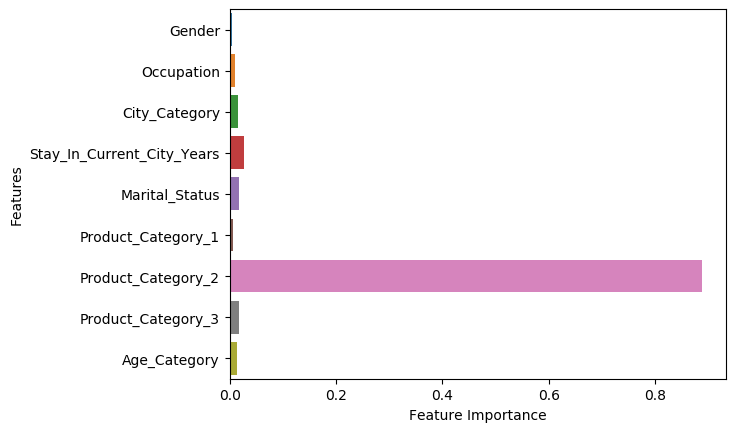

In [110]:
sns.barplot(y="Features", x = "Feature Importance", data = columns)

Product_Category_1 feature has by far the highest regression coefficient and is very important feature in explaining, positively, why people purchase in mass on Black Friday.

# Conclusion:
In this analysis we used a machine learning algorithm to predict the amount that a customer is likely to spend on Black Friday.